# **<center><span style= "color:#6495ED;">Boosting Techniques</span></center>**

In [ ]:
# installing xgboost inline through pip
!pip install xgboost -q

In [13]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [14]:
# load dataset
df = sns.load_dataset('iris')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

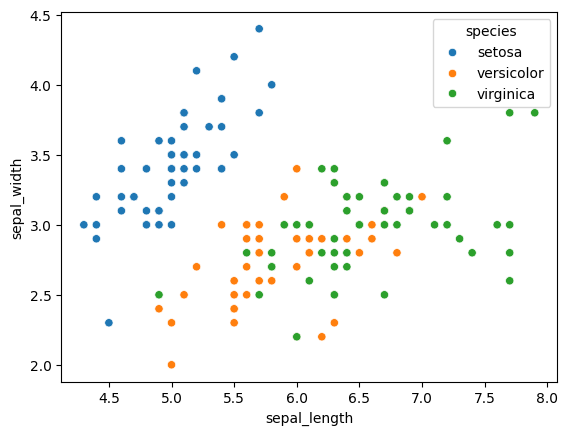

In [15]:
#  plot the data using scatterplot
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)

In [16]:
# split the data into features and target
X = df.drop(columns='species')
y = df['species']

In [27]:
# encode the target
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [28]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
%%time
# train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred, average='micro'))
print('recall_score:', recall_score(y_test, y_pred, average='micro'))
print('f1_score:', f1_score(y_test, y_pred, average='micro'))


Accuracy: 1.0
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
CPU times: total: 31.2 ms
Wall time: 21.9 ms


In [30]:
%%time
# train the random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred, average='micro'))
print('recall_score:', recall_score(y_test, y_pred, average='micro'))
print('f1_score:', f1_score(y_test, y_pred, average='micro'))

Accuracy: 1.0
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
CPU times: total: 250 ms
Wall time: 254 ms


In [32]:
%%time
# train the xgboost model
model = XGBClassifier()

model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred, average='micro'))
print('recall_score:', recall_score(y_test, y_pred, average='micro'))
print('f1_score:', f1_score(y_test, y_pred, average='micro'))

Accuracy: 1.0
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
CPU times: total: 250 ms
Wall time: 327 ms


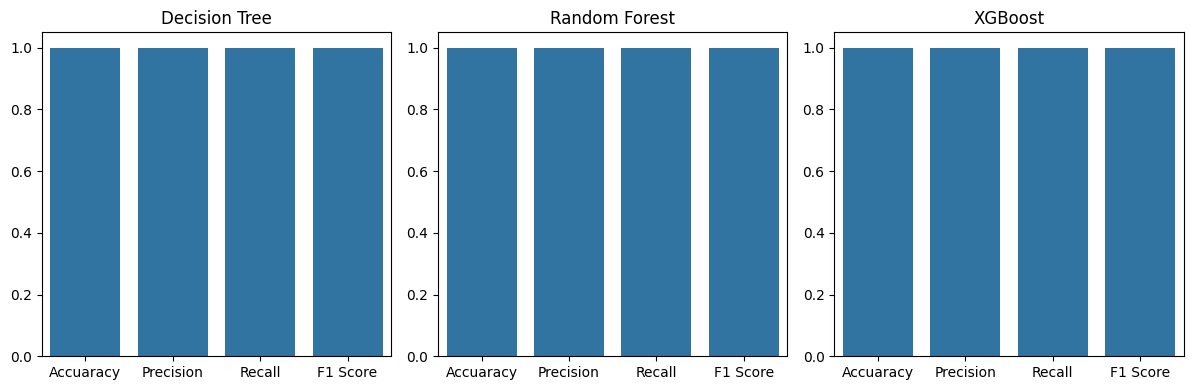

In [40]:
# ploting bar plot to show each matrix with respect to each model
plt.figure(figsize=(16, 4))
plt.subplot(1,4,1)
sns.barplot(x=['Accuaracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1,4,2)
sns.barplot(x=['Accuaracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1,4,3)
sns.barplot(x=['Accuaracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
plt.tight_layout()
plt.show()
